In [6]:
#Parameters Estimated from Cell Biology by the Numbers http://book.bionumbers.org/
f = open("parameters2.txt")
print(f.read())

mechanism_id	part_id	param_name	param_val	comments
	e coli	Ribo	120	uM assuming ~72000 Ribosomes / e. coli with a volume 1 um^3
	e coli	RNAP	15	uM assuming ~10000 RNAP molecules / e. coli with a volume 1 um^3
	e coli	RNAase	30	uM assuming ~20000 RNAP molecules / e. coli with a volume 1 um^4
	e coli extract 1	Ribo	24	1/5 th the Ribosome concentration of E. Coli
	e coli extract 1	RNAP	3	1/5 th the rnap concentration of E. Coli
	e coli extract 1	RNAase	6	1/5 th the rnaase concentration of E. Coli
	e coli extract 2	Ribo	12	
	e coli extract 2	RNAP	6	
	e coli extract 2	RNAase	3	
		ktx	0.05	transcripts / second per polymerase assuming 50nt/s and transcript length of 1000
		ktl	0.05	proteins / second per ribosome assuming 15aa/s and protein length of 300
		cooperativity	2	Seems like a good default
		kb	100	assuming 10ms to diffuse across 1um (characteristic cell size)
		ku	10	"""90% binding"""
		kdil	0.001	assuming half life of ~20 minutes for everything (e coli doubling time)
rna_degredation_

In [1]:
from bioscrape import *
import bioscrape

In [3]:
from biocrnpyler import *
import numpy as np

#DNA_Assemblies are a core Component consisting of a promoter, and RBS
#The transcript and protein will be named automatically or can be named manually with those keywords
const_gfp = DNAassembly(name = "GFP", promoter = "P", rbs = "RBS")

#Expression Extract is a Mixture with very simple internal models
Model_expression = ExpressionExtract(name = "extract", components = [const_gfp], parameter_file = "parameters2.txt")

print("BioCRNpyler Representation:\n", repr(Model_expression))

#BioCRNpyler Models are Compiled into a CRN
CRN_expression = Model_expression.compile_crn()
print("\nCRN Representation:\n", repr(CRN_expression))

#Save as SBML
CRN_expression.write_sbml_file("CRN_expression.sbml")

#Simulate with Bioscrape
timepoints = np.linspace(0, 200, 1000)
x0 = {"dna_GFP":1.0}
re = CRN_expression.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)




BioCRNpyler Representation:
 ExpressionExtract: extract
Components = [
	DNAassembly: GFP ]
Mechanisms = {
	transcription:gene_expression
	translation:dummy_translation
	catalysis:basic_catalysis
	binding:one_step_binding }
Global Mechanisms = { }

CRN Representation:
 Species = dna_GFP, protein_GFP
Reactions = [
	dna_GFP --> dna_GFP + protein_GFP        massaction: k_f(dna_GFP)=0.28125*dna_GFP
]


In [15]:
#Make a 
const_gfp = DNAassembly(name = "GFP", promoter = "P", rbs = "RBS") 
#parameter_dict = {('ktx', 0.2)}
parameters = {("ktx"):0.05,
             ('ktl'):0.05,
             ('kb'):100,
             ('ku'):10,
             ('rna_degredation_mm', 'GFP', 'kdeg'):0.000555556} #Parameters in the parameter file can be overwritten by passing in a parameter dictionary


#TxTl Extract is a Mixture with more complex internal models # make sure you have one instance per mixture
extract_1_TXTL = TxTlExtract(name = "e coli extract 1", components = [const_gfp], parameters = parameters)
#extract_1_TXTL = TxTlExtract(name = "e coli extract 1", components = [const_gfp], parameters_file = parameter_dict)


print("BioCRNpyler Representation:\n", repr(extract_1_TXTL))

CRN_extract_1 = extract_1_TXTL.compile_crn()
print("\nCRN Representation:\n", repr(CRN_extract_1))

#Save as SBML
CRN_extract_1.write_sbml_file("CRN_extract_1.sbml")


#Changing the name can load different parameter values
extract_2_TXTL = TxTlExtract(name = "e coli extract 2", components = [const_gfp], parameters_file = parameters)
CRN_extract_2 = extract_2_TXTL.compile_crn()
CRN_extract_2.write_sbml_file("CRN_extract_2.sbml")

BioCRNpyler Representation:
 TxTlExtract: e coli extract 1
Components = [
	DNAassembly: GFP
	Protein: RNAP
	Protein: Ribo
	Protein: RNAase ]
Mechanisms = {
	transcription:transcription_mm
	translation:translation_mm
	rna_degredation:rna_degredation_mm
	catalysis:michalis_menten
	binding:one_step_binding }
Global Mechanisms = { }

CRN Representation:
 Species = protein_RNAP, rna_GFP, complex_protein_RNAase_rna_GFP, dna_GFP, complex_dna_GFP_protein_RNAP, complex_protein_Ribo_rna_GFP, protein_GFP, protein_RNAase, protein_Ribo
Reactions = [
	dna_GFP + protein_RNAP <--> complex_dna_GFP_protein_RNAP        massaction: k_f(dna_GFP,protein_RNAP)=100*dna_GFP*protein_RNAP k_r(complex_dna_GFP_protein_RNAP)=10*complex_dna_GFP_protein_RNAP
	complex_dna_GFP_protein_RNAP --> dna_GFP + rna_GFP + protein_RNAP        massaction: k_f(complex_dna_GFP_protein_RNAP)=0.05*complex_dna_GFP_protein_RNAP
	rna_GFP + protein_Ribo <--> complex_protein_Ribo_rna_GFP        massaction: k_f(rna_GFP,protein_Ribo)=100*rn

True

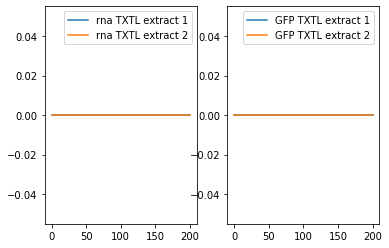

In [18]:
import pylab as plt
#Simulate with Bioscrape
timepoints = np.linspace(0, 200, 1000)
x0 = {"dna_GFP":1.0}
# Re1, me1 = CRN_extract_1.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0, file = "CRN_extract_1.sbml")
# Re2, me2 = CRN_extract_1.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0, file = "CRN_extract_2.sbml")
Re1 = CRN_extract_1.simulate_with_bioscrape(timepoints, initial_condition_dict = x0, file = "CRN_extract_1.sbml")
Re2 = CRN_extract_1.simulate_with_bioscrape(timepoints, initial_condition_dict = x0, file = "CRN_extract_2.sbml")


plt.subplot(121)
plt.plot(timepoints, Re1["rna_GFP"], label = "rna TXTL extract 1")
plt.plot(timepoints, Re2["rna_GFP"], label = "rna TXTL extract 2")
plt.legend()

plt.subplot(122)
#plt.plot(timepoints, Rexpress["protein_GFP"], label = "GFP Expression Model")
plt.plot(timepoints, Re1["protein_GFP"], label = "GFP TXTL extract 1")
plt.plot(timepoints, Re2["protein_GFP"], label = "GFP TXTL extract 2")

plt.legend()

In [19]:
Re1

,protein_RNAP,rna_GFP,complex_protein_RNAase_rna_GFP,dna_GFP,complex_dna_GFP_protein_RNAP,complex_protein_Ribo_rna_GFP,protein_GFP,protein_RNAase,protein_Ribo,time
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.200200
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.400400
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.600601
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.800801
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,199.199199
996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,199.399399
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,199.599600
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,199.799800
